Import & Clean Fares Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_fares = pd.read_csv('/content/fares.csv', dtype={'ntd_id': str})

In [ ]:
df_fares.tail(30)

,year,ntd_id,agency,mode,ticket_cost,ticket_type,largest_tix_package_option
36,2024,80001,Utah Transit Authority,LR,$5.00,single day,monthly
37,2024,80006,Denver Regional Transportation District (RTD),LR,$5.50,single day,monthly
38,2024,90013,Santa Clara Valley Transportation Authority (VTA),LR,$7.50,single day,annual
39,2024,90015,City and County of San Francisco (SFMTA),LR,$5.00,single day,monthly
40,2024,90019,Sacramento Regional Transit District (SACRT),LR,$7.00,single day,monthly
41,2024,90026,San Diego Metropolitan Transit System (MTS),LR,$6.00,single day,monthly
42,2024,90154,Los Angeles County Metropolitan Transportation...,LR,$5.00,single day,monthly
43,2024,90209,"Valley Metro Rail, Inc. (Valley Metro)",LR,$4.00,single day,monthly
44,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,$3.33,bulk per day,monthly
45,2024,00040,Central Puget Sound Regional Transit Authority,LR,$5.00,bulk per day,daily


In [ ]:
# Remove the dollar sign using str.replace
df_fares['ticket_cost'] = df_fares['ticket_cost'].str.replace('$', '')

In [ ]:
# Cast data type as float
df_fares['ticket_cost'] = df_fares['ticket_cost'].astype(float)

In [ ]:
print(df_fares['agency'].tolist())

['Tri-County Metropolitan Transportation District of Oregon', 'Central Puget Sound Regional Transit Authority', 'Massachusetts Bay Transportation Authority', 'Niagara Frontier Transportation Authority', 'New Jersey Transit Corporation', 'Pittsburgh Regional Transit', 'Maryland Transit Administration', 'Transportation District Commission of Hampton Roads', 'City of Charlotte North Carolina', 'The Greater Cleveland Regional Transit Authority', 'Metro Transit', 'Metropolitan Transit Authority of Harris County, Texas', 'Dallas Area Rapid Transit', 'Bi-State Development Agency of the Missouri-Illinois Metropolitan District', 'Utah Transit Authority', 'Denver Regional Transportation District', 'Santa Clara Valley Transportation Authority', 'City and County of San Francisco', 'Sacramento Regional Transit District', 'San Diego Metropolitan Transit System', 'Los Angeles County Metropolitan Transportation Authority', 'Valley Metro Rail, Inc.', 'Tri-County Metropolitan Transportation District of 

In [ ]:
df_fares['agency'].replace({'Metro Transit (Minneapolis)': 'Metro Transit',
                            'Denver Regional Transportation District (RTD)': 'Denver Regional Transportation District',
                           'Santa Clara Valley Transportation Authority (VTA)': 'Santa Clara Valley Transportation Authority',
                            'City and County of San Francisco (SFMTA)': 'City and County of San Francisco',
                            'Sacramento Regional Transit District (SACRT)': 'Sacramento Regional Transit District',
                            'San Diego Metropolitan Transit System (MTS)':'San Diego Metropolitan Transit System',
                            'Los Angeles County Metropolitan Transportation Authority (Metro)':'Los Angeles County Metropolitan Transportation Authority',
                            'Valley Metro Rail, Inc. (Valley Metro)':'Valley Metro Rail, Inc.'
                            }, inplace=True)

In [ ]:
df_fares.loc[df_fares['agency'] == 'New Jersey Transit Corporation', 'agency'] = 'New Jersey Transit Corporation - Newark'

In [ ]:
df_fares.loc[(df_fares['agency'] == 'New Jersey Transit Corporation - Newark') & (df_fares['ticket_type'] == 'single ride'), 'ticket_cost'] = 1.80

In [ ]:
df_fares.loc[(df_fares['agency'] == 'New Jersey Transit Corporation - Newark') & (df_fares['ticket_type'] == 'single day'), 'ticket_cost'] = 3.60

In [ ]:
df_fares.loc[(df_fares['agency'] == 'New Jersey Transit Corporation - Newark') & (df_fares['ticket_type'] == 'bulk per day'), 'ticket_cost'] = 2.23

In [ ]:
df_fares.loc[len(df_fares)] = ['2024', '20080', 'New Jersey Transit Corporation - Hudson','LR',2.55,'single ride','monthly']
df_fares.loc[len(df_fares)] = ['2024', '20080', 'New Jersey Transit Corporation - Hudson','LR',5.10,'single day','monthly']
df_fares.loc[len(df_fares)] = ['2024', '20080', 'New Jersey Transit Corporation - Hudson','LR',2.67,'bulk per day','monthly']

In [ ]:
df_fares = df_fares.drop(66)

In [ ]:
df_fares = df_fares.drop(67)

Investigate Ticket Cost by Ticket Type

Single Rides

In [ ]:
df_single_rides = df_fares[(df_fares['ticket_type'] == 'single ride')]

In [ ]:
df_single_rides['ticket_cost'].describe()

count    22.000000
mean      2.270455
std       0.383176
min       1.250000
25%       2.000000
50%       2.450000
75%       2.500000
max       2.800000
Name: ticket_cost, dtype: float64

In [ ]:
# Create a function to apply to each row
def categorize(row):
    if row['ticket_cost'] <= 2.0:
        return 1
    elif row['ticket_cost'] > 2.0 and row['ticket_cost'] <= 2.45 :
        return 2
    elif row['ticket_cost'] > 2.45 and row['ticket_cost'] <= 2.5:
        return 3
    elif row['ticket_cost'] > 2.5:
        return 4

# Apply the function to create a new column 'Category'
df_single_rides['quartile_rank_sr'] = df_single_rides.apply(categorize, axis=1)

print(df_single_rides)

    year ntd_id                                             agency mode  \
0   2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
1   2024  00040     Central Puget Sound Regional Transit Authority   LR   
2   2024  10003         Massachusetts Bay Transportation Authority   LR   
3   2024  20004          Niagara Frontier Transportation Authority   LR   
4   2024  20080            New Jersey Transit Corporation - Newark   LR   
5   2024  30022                        Pittsburgh Regional Transit   LR   
6   2024  30034                    Maryland Transit Administration   LR   
7   2024  30083  Transportation District Commission of Hampton ...   LR   
8   2024  40008                   City of Charlotte North Carolina   LR   
9   2024  50015   The Greater Cleveland Regional Transit Authority   LR   
10  2024  50027                                      Metro Transit   LR   
11  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
12  2024  60056          

<ipython-input-19-dee6127e40d1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_rides['quartile_rank_sr'] = df_single_rides.apply(categorize, axis=1)


In [ ]:
top_3_x = df_single_rides.nlargest(3, 'ticket_cost')
print(top_3_x)
bot_3_x = df_single_rides.nsmallest(3, 'ticket_cost')
print(bot_3_x)

    year ntd_id                                             agency mode  \
0   2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
5   2024  30022                        Pittsburgh Regional Transit   LR   
15  2024  80006            Denver Regional Transportation District   LR   

    ticket_cost  ticket_type largest_tix_package_option  quartile_rank_sr  
0          2.80  single ride                    monthly                 4  
5          2.75  single ride                     annual                 4  
15         2.75  single ride                    monthly                 4  
    year ntd_id                                             agency mode  \
11  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
20  2024  90154  Los Angeles County Metropolitan Transportation...   LR   
4   2024  20080            New Jersey Transit Corporation - Newark   LR   

    ticket_cost  ticket_type largest_tix_package_option  quartile_rank_sr  
11         1.25  s

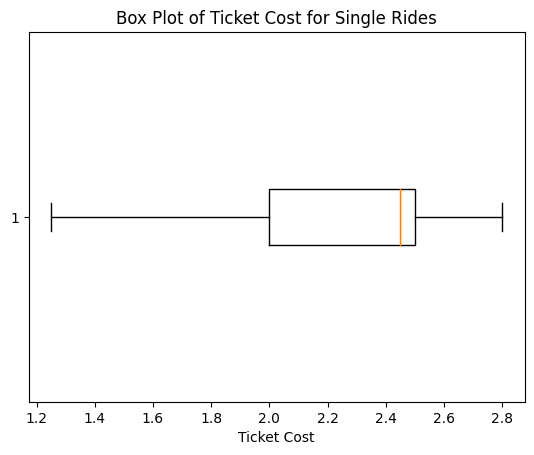

In [ ]:
plt.boxplot(df_single_rides['ticket_cost'], vert=False)
plt.xlabel('Ticket Cost')
plt.title('Box Plot of Ticket Cost for Single Rides')
plt.show()

Single Day

In [ ]:
df_single_day = df_fares[(df_fares['ticket_type'] == 'single day')]

In [ ]:
top_3_x = df_single_day.nlargest(3, 'ticket_cost')
print(top_3_x)
bot_3_x = df_single_day.nsmallest(3, 'ticket_cost')
print(bot_3_x)

    year ntd_id                                       agency mode  \
24  2024  10003   Massachusetts Bay Transportation Authority   LR   
38  2024  90013  Santa Clara Valley Transportation Authority   LR   
27  2024  30022                  Pittsburgh Regional Transit   LR   

    ticket_cost ticket_type largest_tix_package_option  
24         11.0  single day                    monthly  
38          7.5  single day                     annual  
27          7.0  single day                     annual  
    year ntd_id                                             agency mode  \
33  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
26  2024  20080            New Jersey Transit Corporation - Newark   LR   
32  2024  50027                                      Metro Transit   LR   

    ticket_cost ticket_type largest_tix_package_option  
33          3.0  single day                      daily  
26          3.6  single day                    monthly  
32          4.0  single

In [ ]:
df_single_day['ticket_cost'].describe()

count    22.000000
mean      5.495455
std       1.667470
min       3.000000
25%       4.700000
50%       5.000000
75%       6.000000
max      11.000000
Name: ticket_cost, dtype: float64

In [ ]:
# Create a function to apply to each row
def categorize(row):
    if row['ticket_cost'] <= 4.7:
        return 1
    elif row['ticket_cost'] > 4.7 and row['ticket_cost'] <= 5.0 :
        return 2
    elif row['ticket_cost'] > 5.0 and row['ticket_cost'] <= 6.0:
        return 3
    elif row['ticket_cost'] > 6.0:
        return 4

# Apply the function to create a new column 'Category'
df_single_day['quartile_rank_sd'] = df_single_day.apply(categorize, axis=1)

print(df_single_day)

    year ntd_id                                             agency mode  \
22  2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
23  2024  00040     Central Puget Sound Regional Transit Authority   LR   
24  2024  10003         Massachusetts Bay Transportation Authority   LR   
25  2024  20004          Niagara Frontier Transportation Authority   LR   
26  2024  20080            New Jersey Transit Corporation - Newark   LR   
27  2024  30022                        Pittsburgh Regional Transit   LR   
28  2024  30034                    Maryland Transit Administration   LR   
29  2024  30083  Transportation District Commission of Hampton ...   LR   
30  2024  40008                   City of Charlotte North Carolina   LR   
31  2024  50015   The Greater Cleveland Regional Transit Authority   LR   
32  2024  50027                                      Metro Transit   LR   
33  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
34  2024  60056          

<ipython-input-25-ba7642a8b2c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_day['quartile_rank_sd'] = df_single_day.apply(categorize, axis=1)


In [ ]:
df_single_day

,year,ntd_id,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,quartile_rank_sd
22,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,5.6,single day,monthly,3
23,2024,00040,Central Puget Sound Regional Transit Authority,LR,5.0,single day,daily,2
24,2024,10003,Massachusetts Bay Transportation Authority,LR,11.0,single day,monthly,4
25,2024,20004,Niagara Frontier Transportation Authority,LR,5.0,single day,monthly,2
26,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,monthly,1
27,2024,30022,Pittsburgh Regional Transit,LR,7.0,single day,annual,4
28,2024,30034,Maryland Transit Administration,LR,4.6,single day,monthly,1
29,2024,30083,Transportation District Commission of Hampton ...,LR,4.5,single day,monthly,1
30,2024,40008,City of Charlotte North Carolina,LR,6.6,single day,monthly,4
31,2024,50015,The Greater Cleveland Regional Transit Authority,LR,5.0,single day,monthly,2


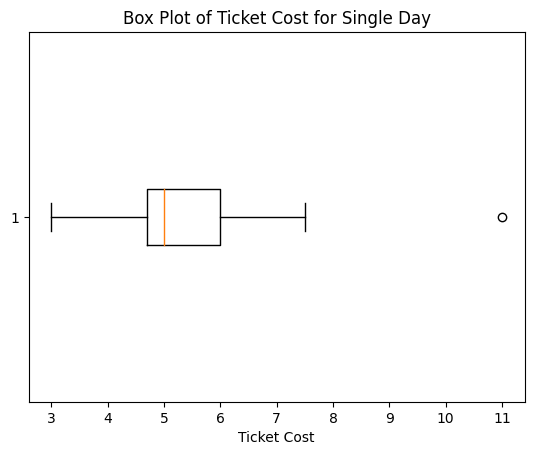

In [ ]:
plt.boxplot(df_single_day['ticket_cost'], vert=False)
plt.xlabel('Ticket Cost')
plt.title('Box Plot of Ticket Cost for Single Day')
plt.show()

Bulk Option

In [ ]:
df_bulk = df_fares[(df_fares['ticket_type'] == 'bulk per day')]

In [ ]:
df_bulk['ticket_cost'].describe()

count    23.000000
mean      2.910435
std       0.619872
min       2.060000
25%       2.550000
50%       2.830000
75%       3.050000
max       5.000000
Name: ticket_cost, dtype: float64

In [ ]:
# Create a function to apply to each row
def categorize(row):
    if row['ticket_cost'] <= 2.55:
        return 1
    elif row['ticket_cost'] > 2.55 and row['ticket_cost'] <= 2.83 :
        return 2
    elif row['ticket_cost'] > 2.83 and row['ticket_cost'] <= 3.05:
        return 3
    elif row['ticket_cost'] > 3.05:
        return 4

# Apply the function to create a new column 'Category'
df_bulk['quartile_rank_bulk'] = df_bulk.apply(categorize, axis=1)

print(df_bulk)

    year ntd_id                                             agency mode  \
44  2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
45  2024  00040     Central Puget Sound Regional Transit Authority   LR   
46  2024  10003         Massachusetts Bay Transportation Authority   LR   
47  2024  20004          Niagara Frontier Transportation Authority   LR   
48  2024  20080            New Jersey Transit Corporation - Newark   LR   
49  2024  30022                        Pittsburgh Regional Transit   LR   
50  2024  30034                    Maryland Transit Administration   LR   
51  2024  30083  Transportation District Commission of Hampton ...   LR   
52  2024  40008                   City of Charlotte North Carolina   LR   
53  2024  50015   The Greater Cleveland Regional Transit Authority   LR   
54  2024  50027                                      Metro Transit   LR   
55  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
56  2024  60056          

<ipython-input-30-8a2be0bda219>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bulk['quartile_rank_bulk'] = df_bulk.apply(categorize, axis=1)


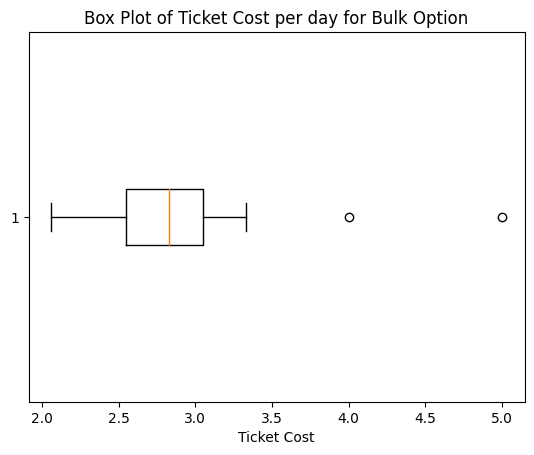

In [ ]:
plt.boxplot(df_bulk['ticket_cost'],vert=False)
plt.xlabel('Ticket Cost')
plt.title('Box Plot of Ticket Cost per day for Bulk Option')
plt.show()

In [ ]:
top_3_x = df_bulk.nlargest(3, 'ticket_cost')
print(top_3_x)
bot_3_x = df_bulk.nsmallest(3, 'ticket_cost')
print(bot_3_x)

    year ntd_id                                             agency mode  \
45  2024  00040     Central Puget Sound Regional Transit Authority   LR   
54  2024  50027                                      Metro Transit   LR   
44  2024  00008  Tri-County Metropolitan Transportation Distric...   LR   

    ticket_cost   ticket_type largest_tix_package_option  quartile_rank_bulk  
45         5.00  bulk per day                      daily                   4  
54         4.00  bulk per day                      daily                   4  
44         3.33  bulk per day                    monthly                   4  
    year ntd_id                                             agency mode  \
65  2024  90209                            Valley Metro Rail, Inc.   LR   
48  2024  20080            New Jersey Transit Corporation - Newark   LR   
51  2024  30083  Transportation District Commission of Hampton ...   LR   

    ticket_cost   ticket_type largest_tix_package_option  quartile_rank_bulk  
65 

Min and Max Ticket Costs by Ticket Type

In [ ]:
grouped = df_fares.groupby('ticket_type')['ticket_cost'].agg(['max', 'min'])

In [ ]:
print(grouped)

               max   min
ticket_type             
bulk per day   5.0  2.06
single day    11.0  3.00
single ride    2.8  1.25


Bulk Option Value Counts

In [ ]:
df_new = df_fares.drop(columns=['ticket_type', 'ticket_cost'])
distinct_bulk_options_df = df_new.drop_duplicates(subset=['agency', 'largest_tix_package_option'])

print(distinct_bulk_options_df)

    year ntd_id                                             agency mode  \
0   2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
1   2024  00040     Central Puget Sound Regional Transit Authority   LR   
2   2024  10003         Massachusetts Bay Transportation Authority   LR   
3   2024  20004          Niagara Frontier Transportation Authority   LR   
4   2024  20080            New Jersey Transit Corporation - Newark   LR   
5   2024  30022                        Pittsburgh Regional Transit   LR   
6   2024  30034                    Maryland Transit Administration   LR   
7   2024  30083  Transportation District Commission of Hampton ...   LR   
8   2024  40008                   City of Charlotte North Carolina   LR   
9   2024  50015   The Greater Cleveland Regional Transit Authority   LR   
10  2024  50027                                      Metro Transit   LR   
11  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
12  2024  60056          

In [ ]:
distinct_bulk_options_df['largest_tix_package_option'].value_counts()

largest_tix_package_option
monthly    18
daily       3
annual      2
Name: count, dtype: int64

Merging the dfs that are split out by ticket type so that comparsions can be made across columns

In [ ]:
merged = pd.merge(df_single_rides, df_single_day, on='ntd_id', how='inner')

In [ ]:
merged = pd.merge(merged, df_bulk, on='ntd_id', how='inner')

In [ ]:
merged

,year_x,ntd_id,agency_x,mode_x,ticket_cost_x,ticket_type_x,largest_tix_package_option_x,quartile_rank_sr,year_y,agency_y,...,ticket_type_y,largest_tix_package_option_y,quartile_rank_sd,year,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,quartile_rank_bulk
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,monthly,4,2024,Tri-County Metropolitan Transportation Distric...,...,single day,monthly,3,2024,Tri-County Metropolitan Transportation Distric...,LR,3.33,bulk per day,monthly,4
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,daily,2,2024,Central Puget Sound Regional Transit Authority,...,single day,daily,2,2024,Central Puget Sound Regional Transit Authority,LR,5.00,bulk per day,daily,4
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,monthly,2,2024,Massachusetts Bay Transportation Authority,...,single day,monthly,4,2024,Massachusetts Bay Transportation Authority,LR,3.00,bulk per day,monthly,3
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,monthly,1,2024,Niagara Frontier Transportation Authority,...,single day,monthly,2,2024,Niagara Frontier Transportation Authority,LR,2.50,bulk per day,monthly,1
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,2024,New Jersey Transit Corporation - Newark,...,single day,monthly,1,2024,New Jersey Transit Corporation - Newark,LR,2.23,bulk per day,monthly,1
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,2024,New Jersey Transit Corporation - Newark,...,single day,monthly,1,2024,New Jersey Transit Corporation - Hudson,LR,2.67,bulk per day,monthly,2
6,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,annual,4,2024,Pittsburgh Regional Transit,...,single day,annual,4,2024,Pittsburgh Regional Transit,LR,2.94,bulk per day,annual,3
7,2024,30034,Maryland Transit Administration,LR,2.00,single ride,monthly,1,2024,Maryland Transit Administration,...,single day,monthly,1,2024,Maryland Transit Administration,LR,2.48,bulk per day,monthly,1
8,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,monthly,1,2024,Transportation District Commission of Hampton ...,...,single day,monthly,1,2024,Transportation District Commission of Hampton ...,LR,2.33,bulk per day,monthly,1
9,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,monthly,2,2024,City of Charlotte North Carolina,...,single day,monthly,4,2024,City of Charlotte North Carolina,LR,2.93,bulk per day,monthly,3


In [ ]:
## x is single ride, y is single day, nothing is bulk
merged['bulk_pd_cheaper'] = np.where((merged['ticket_cost'] < merged['ticket_cost_y']), 1,0)

In [ ]:
merged['commuter_day_vs_2single_cheaper'] = np.where((merged['ticket_cost_x']*2 >= merged['ticket_cost_y']), 1,0)

****come back to this. want to see a scenario for commuters aka just 2 trips per day.

In [ ]:
merged

,year_x,ntd_id,agency_x,mode_x,ticket_cost_x,ticket_type_x,largest_tix_package_option_x,quartile_rank_sr,year_y,agency_y,...,quartile_rank_sd,year,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,quartile_rank_bulk,bulk_pd_cheaper,commuter_day_vs_2single_cheaper
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,monthly,4,2024,Tri-County Metropolitan Transportation Distric...,...,3,2024,Tri-County Metropolitan Transportation Distric...,LR,3.33,bulk per day,monthly,4,1,1
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,daily,2,2024,Central Puget Sound Regional Transit Authority,...,2,2024,Central Puget Sound Regional Transit Authority,LR,5.00,bulk per day,daily,4,0,0
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,monthly,2,2024,Massachusetts Bay Transportation Authority,...,4,2024,Massachusetts Bay Transportation Authority,LR,3.00,bulk per day,monthly,3,1,0
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,monthly,1,2024,Niagara Frontier Transportation Authority,...,2,2024,Niagara Frontier Transportation Authority,LR,2.50,bulk per day,monthly,1,1,0
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,2024,New Jersey Transit Corporation - Newark,...,1,2024,New Jersey Transit Corporation - Newark,LR,2.23,bulk per day,monthly,1,1,1
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,2024,New Jersey Transit Corporation - Newark,...,1,2024,New Jersey Transit Corporation - Hudson,LR,2.67,bulk per day,monthly,2,1,1
6,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,annual,4,2024,Pittsburgh Regional Transit,...,4,2024,Pittsburgh Regional Transit,LR,2.94,bulk per day,annual,3,1,0
7,2024,30034,Maryland Transit Administration,LR,2.00,single ride,monthly,1,2024,Maryland Transit Administration,...,1,2024,Maryland Transit Administration,LR,2.48,bulk per day,monthly,1,1,0
8,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,monthly,1,2024,Transportation District Commission of Hampton ...,...,1,2024,Transportation District Commission of Hampton ...,LR,2.33,bulk per day,monthly,1,1,0
9,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,monthly,2,2024,City of Charlotte North Carolina,...,4,2024,City of Charlotte North Carolina,LR,2.93,bulk per day,monthly,3,1,0


In [ ]:
merged['bulk_pd_savings'] = merged['ticket_cost_y'] - merged['ticket_cost']

In [ ]:
# Merge df1 and df2 on 'ID' column, adding 'Age' column to df1
merged_df = pd.merge(df_fares, merged[['ntd_id', 'bulk_pd_cheaper']], on='ntd_id', how='left')

In [ ]:
# Merge df1 and df2 on 'ID' column, adding 'Age' column to df1
merged_df2 = pd.merge(merged_df, merged[['ntd_id', 'bulk_pd_savings']], on='ntd_id', how='left')

In [ ]:
merged_df2.tail(44)

,year,ntd_id,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,bulk_pd_cheaper,bulk_pd_savings
35,2024,30083,Transportation District Commission of Hampton ...,LR,4.50,single day,monthly,1,2.17
36,2024,40008,City of Charlotte North Carolina,LR,6.60,single day,monthly,1,3.67
37,2024,50015,The Greater Cleveland Regional Transit Authority,LR,5.00,single day,monthly,1,1.83
38,2024,50027,Metro Transit,LR,4.00,single day,daily,0,0.00
39,2024,60008,Metropolitan Transit Authority of Harris Count...,LR,3.00,single day,daily,0,0.00
40,2024,60056,Dallas Area Rapid Transit,LR,6.00,single day,monthly,1,2.90
41,2024,70006,Bi-State Development Agency of the Missouri-Il...,LR,5.00,single day,monthly,1,2.40
42,2024,80001,Utah Transit Authority,LR,5.00,single day,monthly,1,2.17
43,2024,80006,Denver Regional Transportation District,LR,5.50,single day,monthly,1,2.57
44,2024,90013,Santa Clara Valley Transportation Authority,LR,7.50,single day,annual,1,4.79


want to figure out how many single passes you would have to use for it to be worth it. like when single_day_pass x days_used = monthly_total
step 1: create a column that captures the bulk total price (will have to consider that some are daily, some monthly, some annual)
step 2: add that column to main table
step 3: create new column in main table that algebraically captures if its worth it

In [ ]:
# Create a function to apply to each row
def categorize(row):
    if row['largest_tix_package_option_x'] == 'daily':
        return row['ticket_cost_y']
    elif row['largest_tix_package_option_x'] == 'monthly':
        return row['ticket_cost'] * 30
    elif row['largest_tix_package_option_x'] == 'annual':
        return row['ticket_cost'] * 365

# Apply the function to create a new column 'Category'
merged['bulk_total_cost'] = merged.apply(categorize, axis=1)

print(merged)

   year_x ntd_id                                           agency_x mode_x  \
0    2024  00008  Tri-County Metropolitan Transportation Distric...     LR   
1    2024  00040     Central Puget Sound Regional Transit Authority     LR   
2    2024  10003         Massachusetts Bay Transportation Authority     LR   
3    2024  20004          Niagara Frontier Transportation Authority     LR   
4    2024  20080            New Jersey Transit Corporation - Newark     LR   
5    2024  20080            New Jersey Transit Corporation - Newark     LR   
6    2024  30022                        Pittsburgh Regional Transit     LR   
7    2024  30034                    Maryland Transit Administration     LR   
8    2024  30083  Transportation District Commission of Hampton ...     LR   
9    2024  40008                   City of Charlotte North Carolina     LR   
10   2024  50015   The Greater Cleveland Regional Transit Authority     LR   
11   2024  50027                                      Metro Tran

In [ ]:
merged

,year_x,ntd_id,agency_x,mode_x,ticket_cost_x,ticket_type_x,largest_tix_package_option_x,quartile_rank_sr,year_y,agency_y,...,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,quartile_rank_bulk,bulk_pd_cheaper,commuter_day_vs_2single_cheaper,bulk_pd_savings,bulk_total_cost
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,monthly,4,2024,Tri-County Metropolitan Transportation Distric...,...,Tri-County Metropolitan Transportation Distric...,LR,3.33,bulk per day,monthly,4,1,1,2.27,99.90
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,daily,2,2024,Central Puget Sound Regional Transit Authority,...,Central Puget Sound Regional Transit Authority,LR,5.00,bulk per day,daily,4,0,0,0.00,5.00
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,monthly,2,2024,Massachusetts Bay Transportation Authority,...,Massachusetts Bay Transportation Authority,LR,3.00,bulk per day,monthly,3,1,0,8.00,90.00
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,monthly,1,2024,Niagara Frontier Transportation Authority,...,Niagara Frontier Transportation Authority,LR,2.50,bulk per day,monthly,1,1,0,2.50,75.00
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,2024,New Jersey Transit Corporation - Newark,...,New Jersey Transit Corporation - Newark,LR,2.23,bulk per day,monthly,1,1,1,1.37,66.90
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,2024,New Jersey Transit Corporation - Newark,...,New Jersey Transit Corporation - Hudson,LR,2.67,bulk per day,monthly,2,1,1,0.93,80.10
6,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,annual,4,2024,Pittsburgh Regional Transit,...,Pittsburgh Regional Transit,LR,2.94,bulk per day,annual,3,1,0,4.06,1073.10
7,2024,30034,Maryland Transit Administration,LR,2.00,single ride,monthly,1,2024,Maryland Transit Administration,...,Maryland Transit Administration,LR,2.48,bulk per day,monthly,1,1,0,2.12,74.40
8,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,monthly,1,2024,Transportation District Commission of Hampton ...,...,Transportation District Commission of Hampton ...,LR,2.33,bulk per day,monthly,1,1,0,2.17,69.90
9,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,monthly,2,2024,City of Charlotte North Carolina,...,City of Charlotte North Carolina,LR,2.93,bulk per day,monthly,3,1,0,3.67,87.90


In [ ]:
merged_df3 = pd.merge(merged_df2, merged[['ntd_id', 'bulk_total_cost']], on='ntd_id', how='left')

In [ ]:
merged_df3.head(50)

,year,ntd_id,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,bulk_pd_cheaper,bulk_pd_savings,bulk_total_cost
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,monthly,1,2.27,99.90
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,daily,0,0.00,5.00
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,monthly,1,8.00,90.00
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,monthly,1,2.50,75.00
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,1.37,66.90
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,1.37,80.10
6,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,0.93,66.90
7,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,0.93,80.10
8,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,1.37,66.90
9,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1,1.37,80.10


In [ ]:
df_single_day2 = df_single_day.drop(columns=['largest_tix_package_option'])
df_single_day3 = df_single_day2.drop_duplicates()

print(df_single_day3)

    year ntd_id                                             agency mode  \
22  2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
23  2024  00040     Central Puget Sound Regional Transit Authority   LR   
24  2024  10003         Massachusetts Bay Transportation Authority   LR   
25  2024  20004          Niagara Frontier Transportation Authority   LR   
26  2024  20080            New Jersey Transit Corporation - Newark   LR   
27  2024  30022                        Pittsburgh Regional Transit   LR   
28  2024  30034                    Maryland Transit Administration   LR   
29  2024  30083  Transportation District Commission of Hampton ...   LR   
30  2024  40008                   City of Charlotte North Carolina   LR   
31  2024  50015   The Greater Cleveland Regional Transit Authority   LR   
32  2024  50027                                      Metro Transit   LR   
33  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
34  2024  60056          

In [ ]:
merged_single_day = pd.merge(df_single_day3, merged_df3[['ntd_id', 'bulk_total_cost']], on='ntd_id', how='left').drop_duplicates().reset_index().drop(columns=['index'])

In [ ]:
merged_single_day

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sd,bulk_total_cost
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,5.6,single day,3,99.90
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,5.0,single day,2,5.00
2,2024,10003,Massachusetts Bay Transportation Authority,LR,11.0,single day,4,90.00
3,2024,20004,Niagara Frontier Transportation Authority,LR,5.0,single day,2,75.00
4,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.90
5,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.10
6,2024,30022,Pittsburgh Regional Transit,LR,7.0,single day,4,1073.10
7,2024,30034,Maryland Transit Administration,LR,4.6,single day,1,74.40
8,2024,30083,Transportation District Commission of Hampton ...,LR,4.5,single day,1,69.90
9,2024,40008,City of Charlotte North Carolina,LR,6.6,single day,4,87.90


In [ ]:
merged_single_day['min_days_for_bulk_savings'] = merged_single_day['bulk_total_cost'] / merged_single_day['ticket_cost']

In [ ]:
merged_single_day

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sd,bulk_total_cost,min_days_for_bulk_savings
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,5.6,single day,3,99.90,17.839286
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,5.0,single day,2,5.00,1.000000
2,2024,10003,Massachusetts Bay Transportation Authority,LR,11.0,single day,4,90.00,8.181818
3,2024,20004,Niagara Frontier Transportation Authority,LR,5.0,single day,2,75.00,15.000000
4,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.90,18.583333
5,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.10,22.250000
6,2024,30022,Pittsburgh Regional Transit,LR,7.0,single day,4,1073.10,153.300000
7,2024,30034,Maryland Transit Administration,LR,4.6,single day,1,74.40,16.173913
8,2024,30083,Transportation District Commission of Hampton ...,LR,4.5,single day,1,69.90,15.533333
9,2024,40008,City of Charlotte North Carolina,LR,6.6,single day,4,87.90,13.318182


In [ ]:
df_single_rides2 = df_single_rides.drop(columns=['largest_tix_package_option'])
df_single_rides3 = df_single_rides2.drop_duplicates()

print(df_single_rides3)

    year ntd_id                                             agency mode  \
0   2024  00008  Tri-County Metropolitan Transportation Distric...   LR   
1   2024  00040     Central Puget Sound Regional Transit Authority   LR   
2   2024  10003         Massachusetts Bay Transportation Authority   LR   
3   2024  20004          Niagara Frontier Transportation Authority   LR   
4   2024  20080            New Jersey Transit Corporation - Newark   LR   
5   2024  30022                        Pittsburgh Regional Transit   LR   
6   2024  30034                    Maryland Transit Administration   LR   
7   2024  30083  Transportation District Commission of Hampton ...   LR   
8   2024  40008                   City of Charlotte North Carolina   LR   
9   2024  50015   The Greater Cleveland Regional Transit Authority   LR   
10  2024  50027                                      Metro Transit   LR   
11  2024  60008  Metropolitan Transit Authority of Harris Count...   LR   
12  2024  60056          

In [ ]:
merged_single_rides = pd.merge(df_single_rides3, merged_df3[['ntd_id', 'bulk_total_cost']], on='ntd_id', how='left').drop_duplicates().reset_index().drop(columns=['index'])

In [ ]:
merged_single_rides

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sr,bulk_total_cost
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,4,99.90
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,2,5.00
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,2,90.00
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,1,75.00
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,66.90
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,80.10
6,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,4,1073.10
7,2024,30034,Maryland Transit Administration,LR,2.00,single ride,1,74.40
8,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,1,69.90
9,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,2,87.90


In [ ]:
merged_single_rides['min_rides_for_bulk_savings'] = merged_single_rides['bulk_total_cost'] / merged_single_rides['ticket_cost']

In [ ]:
merged_single_rides['min_rides_for_bulk_savings'] = np.ceil(merged_single_rides['min_rides_for_bulk_savings'])

In [ ]:
merged_single_rides

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sr,bulk_total_cost,min_rides_for_bulk_savings
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,4,99.90,36.0
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,2,5.00,3.0
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,2,90.00,38.0
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,1,75.00,38.0
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,66.90,38.0
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,80.10,45.0
6,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,4,1073.10,391.0
7,2024,30034,Maryland Transit Administration,LR,2.00,single ride,1,74.40,38.0
8,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,1,69.90,35.0
9,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,2,87.90,40.0


In [ ]:
merged_single_rides_final = pd.merge(merged_single_rides, distinct_bulk_options_df[['ntd_id', 'largest_tix_package_option']], on='ntd_id', how='left')

In [ ]:
merged_single_rides_final

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sr,bulk_total_cost,min_rides_for_bulk_savings,largest_tix_package_option
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,4,99.90,36.0,monthly
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,2,5.00,3.0,daily
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,2,90.00,38.0,monthly
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,1,75.00,38.0,monthly
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,66.90,38.0,monthly
5,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,66.90,38.0,monthly
6,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,80.10,45.0,monthly
7,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,1,80.10,45.0,monthly
8,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,4,1073.10,391.0,annual
9,2024,30034,Maryland Transit Administration,LR,2.00,single ride,1,74.40,38.0,monthly


In [ ]:
merged_single_day_final = pd.merge(merged_single_day, distinct_bulk_options_df[['ntd_id', 'largest_tix_package_option']], on='ntd_id', how='left')

In [ ]:
merged_single_day_final['min_days_for_bulk_savings'] = np.ceil(merged_single_day_final['min_days_for_bulk_savings'])

In [ ]:
merged_single_day_final

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sd,bulk_total_cost,min_days_for_bulk_savings,largest_tix_package_option
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,5.6,single day,3,99.90,18.0,monthly
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,5.0,single day,2,5.00,1.0,daily
2,2024,10003,Massachusetts Bay Transportation Authority,LR,11.0,single day,4,90.00,9.0,monthly
3,2024,20004,Niagara Frontier Transportation Authority,LR,5.0,single day,2,75.00,15.0,monthly
4,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.90,19.0,monthly
5,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.90,19.0,monthly
6,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.10,23.0,monthly
7,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.10,23.0,monthly
8,2024,30022,Pittsburgh Regional Transit,LR,7.0,single day,4,1073.10,154.0,annual
9,2024,30034,Maryland Transit Administration,LR,4.6,single day,1,74.40,17.0,monthly


analysis for days needed to make bulk pass worth it. filtering for month only because 2 annual, and 3 daily (which hold no meaning)

In [ ]:
filtered_sd = merged_single_day_final.loc[merged_single_day_final['largest_tix_package_option'] == 'monthly']

In [ ]:
filtered_sd['min_days_for_bulk_savings'].describe()

count    20.0000
mean     16.7500
std       3.2424
min       9.0000
25%      15.7500
50%      16.5000
75%      18.2500
max      23.0000
Name: min_days_for_bulk_savings, dtype: float64

In [ ]:
filtered_sd['commuter_bonus'] = -1

# Update the new column based on conditionals
filtered_sd.loc[filtered_sd['min_days_for_bulk_savings'] > 22, 'commuter_bonus'] = 0

<ipython-input-69-2457c1909a91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sd['commuter_bonus'] = -1


In [ ]:
filtered_sd

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sd,bulk_total_cost,min_days_for_bulk_savings,largest_tix_package_option,commuter_bonus
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,5.6,single day,3,99.9,18.0,monthly,-1
2,2024,10003,Massachusetts Bay Transportation Authority,LR,11.0,single day,4,90.0,9.0,monthly,-1
3,2024,20004,Niagara Frontier Transportation Authority,LR,5.0,single day,2,75.0,15.0,monthly,-1
4,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.9,19.0,monthly,-1
5,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.9,19.0,monthly,-1
6,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.1,23.0,monthly,0
7,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.1,23.0,monthly,0
9,2024,30034,Maryland Transit Administration,LR,4.6,single day,1,74.4,17.0,monthly,-1
10,2024,30083,Transportation District Commission of Hampton ...,LR,4.5,single day,1,69.9,16.0,monthly,-1
11,2024,40008,City of Charlotte North Carolina,LR,6.6,single day,4,87.9,14.0,monthly,-1


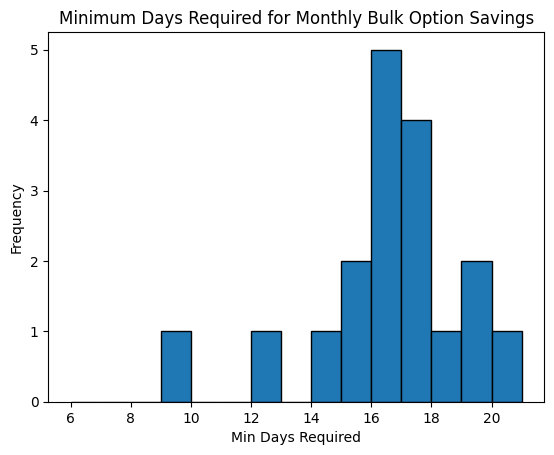

In [ ]:
plt.hist(filtered_sd['min_days_for_bulk_savings'],bins=range(6, 22), edgecolor='black')
plt.xlabel('Min Days Required')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Minimum Days Required for Monthly Bulk Option Savings')  # Plot title
plt.show()

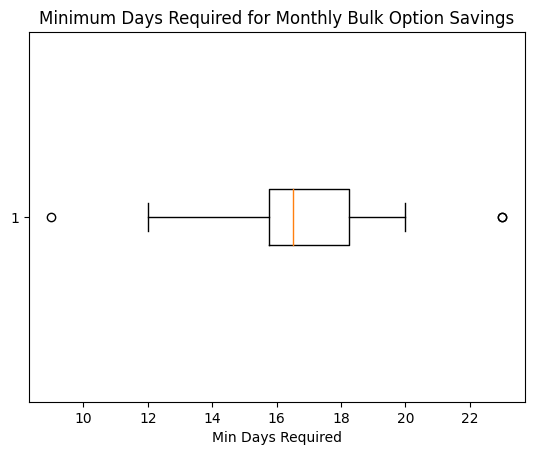

In [ ]:
plt.boxplot(filtered_sd['min_days_for_bulk_savings'], vert=False)
plt.xlabel('Min Days Required')
plt.title('Minimum Days Required for Monthly Bulk Option Savings')
plt.show()

analysis for rides needed to make the bulk option worth it. will include those with monthly only.

In [ ]:
filtered_sr = merged_single_rides_final.loc[merged_single_rides_final['largest_tix_package_option'] == 'monthly']

In [ ]:
filtered_sr['min_rides_for_bulk_savings'].describe()

count    20.000000
mean     37.300000
std       4.780443
min      29.000000
25%      33.750000
50%      38.000000
75%      39.250000
max      47.000000
Name: min_rides_for_bulk_savings, dtype: float64

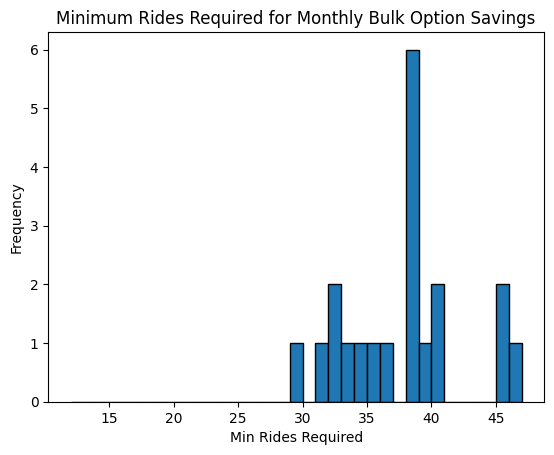

In [ ]:
plt.hist(filtered_sr['min_rides_for_bulk_savings'],bins=range(12, 48), edgecolor='black')
plt.xlabel('Min Rides Required')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Minimum Rides Required for Monthly Bulk Option Savings')  # Plot title
plt.show()

In [ ]:
top_3_x = filtered_sr.nlargest(3, 'min_rides_for_bulk_savings')
print(top_3_x)
bot_3_x = filtered_sr.nsmallest(3, 'min_rides_for_bulk_savings')
print(bot_3_x)

    year ntd_id                                             agency mode  \
23  2024  90154  Los Angeles County Metropolitan Transportation...   LR   
6   2024  20080            New Jersey Transit Corporation - Newark   LR   
7   2024  20080            New Jersey Transit Corporation - Newark   LR   

    ticket_cost  ticket_type  quartile_rank_sr  bulk_total_cost  \
23         1.75  single ride                 1             81.0   
6          1.80  single ride                 1             80.1   
7          1.80  single ride                 1             80.1   

    min_rides_for_bulk_savings largest_tix_package_option  
23                        47.0                    monthly  
6                         45.0                    monthly  
7                         45.0                    monthly  
    year ntd_id                                             agency mode  \
22  2024  90026              San Diego Metropolitan Transit System   LR   
24  2024  90209                         

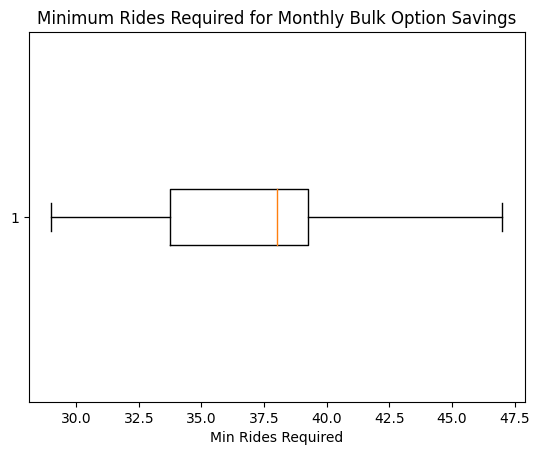

In [ ]:
plt.boxplot(filtered_sr['min_rides_for_bulk_savings'],vert=False)
plt.xlabel('Min Rides Required')
plt.title('Minimum Rides Required for Monthly Bulk Option Savings')
plt.show()

Begin work with distance vs cost

In [ ]:
df_drm = pd.read_csv('/content/drm_cleaned_v2.csv', dtype={'NTD ID': str})

In [ ]:
df_drm.columns

Index(['Last Report Year', 'NTD ID', 'Legacy NTD ID', 'Agency Name',
       'Agency Status', 'Reporter Type', 'Reporting Module', 'City', 'State',
       'Census Year', 'Primary UZA Name', 'UACE Code', 'UZA Area SQ Miles',
       'UZA Population', '2022 Status', 'Mode', 'Service', 'Mode Status',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [ ]:
df_drm.head()

,Last Report Year,NTD ID,Legacy NTD ID,Agency Name,Agency Status,Reporter Type,Reporting Module,City,State,Census Year,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,2022,00008,8,Tri-County Metropolitan Transportation Distric...,Active,Full Reporter,Urban,Portland,OR,2020,...,104.31,104.31,104.31,118.91,118.91,118.91,118.91,118.91,118.91,118.91
1,2022,00040,40,Central Puget Sound Regional Transit Authority...,Active,Full Reporter,Urban,Seattle,WA,2020,...,30.80,30.80,30.80,40.40,40.40,40.40,40.40,40.40,48.98,48.98
2,2022,10003,1003,Massachusetts Bay Transportation Authority (MBTA),Active,Full Reporter,Urban,Boston,MA,2020,...,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,53.25
3,2022,20004,2004,Niagara Frontier Transportation Authority (NFT...,Active,Full Reporter,Urban,Buffalo,NY,2020,...,12.40,12.40,12.40,12.40,12.40,12.40,12.40,12.40,12.40,12.40
4,2022,20080,2080,New Jersey Transit Corporation (NJ TRANSIT),Active,Full Reporter,Urban,Newark,NJ,2020,...,12.42,12.42,12.42,12.42,12.42,12.42,12.42,12.42,12.42,12.42


In [ ]:
df_single_rides

,year,ntd_id,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,quartile_rank_sr
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,monthly,4
1,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,daily,2
2,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,monthly,2
3,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,monthly,1
4,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1
5,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,annual,4
6,2024,30034,Maryland Transit Administration,LR,2.00,single ride,monthly,1
7,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,monthly,1
8,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,monthly,2
9,2024,50015,The Greater Cleveland Regional Transit Authority,LR,2.50,single ride,monthly,3


In [ ]:
df_drm_fares = pd.merge(df_drm, df_single_rides, left_on='NTD ID', right_on='ntd_id', how='inner')

In [ ]:
df_drm_fares.head(30)

,Last Report Year,NTD ID,Legacy NTD ID,Agency Name,Agency Status,Reporter Type,Reporting Module,City,State,Census Year,...,2021,2022,year,ntd_id,agency,mode,ticket_cost,ticket_type,largest_tix_package_option,quartile_rank_sr
0,2022,00008,8,Tri-County Metropolitan Transportation Distric...,Active,Full Reporter,Urban,Portland,OR,2020,...,118.91,118.91,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,2.80,single ride,monthly,4
1,2022,00040,40,Central Puget Sound Regional Transit Authority...,Active,Full Reporter,Urban,Seattle,WA,2020,...,48.98,48.98,2024,00040,Central Puget Sound Regional Transit Authority,LR,2.25,single ride,daily,2
2,2022,10003,1003,Massachusetts Bay Transportation Authority (MBTA),Active,Full Reporter,Urban,Boston,MA,2020,...,51.00,53.25,2024,10003,Massachusetts Bay Transportation Authority,LR,2.40,single ride,monthly,2
3,2022,20004,2004,Niagara Frontier Transportation Authority (NFT...,Active,Full Reporter,Urban,Buffalo,NY,2020,...,12.40,12.40,2024,20004,Niagara Frontier Transportation Authority,LR,2.00,single ride,monthly,1
4,2022,20080,2080,New Jersey Transit Corporation (NJ TRANSIT),Active,Full Reporter,Urban,Newark,NJ,2020,...,12.42,12.42,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1
5,2022,20080,2080,New Jersey Transit Corporation (NJ TRANSIT),Active,Full Reporter,Urban,Newark,NJ,2020,...,34.08,34.08,2024,20080,New Jersey Transit Corporation - Newark,LR,1.80,single ride,monthly,1
6,2022,30022,3022,Port Authority of Allegheny County (Port Autho...,Active,Full Reporter,Urban,Pittsburgh,PA,2020,...,49.64,49.64,2024,30022,Pittsburgh Regional Transit,LR,2.75,single ride,annual,4
7,2022,30034,3034,Maryland Transit Administration (MTA),Active,Full Reporter,Urban,Baltimore,MD,2020,...,57.60,57.60,2024,30034,Maryland Transit Administration,LR,2.00,single ride,monthly,1
8,2022,30083,3083,Transportation District Commission of Hampton ...,Active,Full Reporter,Urban,Hampton,VA,2020,...,14.80,14.80,2024,30083,Transportation District Commission of Hampton ...,LR,2.00,single ride,monthly,1
9,2022,40008,4008,City of Charlotte North Carolina (CATS),Active,Full Reporter,Urban,Charlotte,NC,2020,...,37.30,37.30,2024,40008,City of Charlotte North Carolina,LR,2.20,single ride,monthly,2


In [ ]:
df_drm_fares = df_drm_fares.filter(items=['NTD ID', 'Agency Name', 'Service', '2022', 'ticket_cost'])

In [ ]:
df_drm_fares

,NTD ID,Agency Name,Service,2022,ticket_cost
0,00008,Tri-County Metropolitan Transportation Distric...,DO,118.91,2.80
1,00040,Central Puget Sound Regional Transit Authority...,DO,48.98,2.25
2,10003,Massachusetts Bay Transportation Authority (MBTA),DO,53.25,2.40
3,20004,Niagara Frontier Transportation Authority (NFT...,DO,12.40,2.00
4,20080,New Jersey Transit Corporation (NJ TRANSIT),DO,12.42,1.80
5,20080,New Jersey Transit Corporation (NJ TRANSIT),PT,34.08,1.80
6,30022,Port Authority of Allegheny County (Port Autho...,DO,49.64,2.75
7,30034,Maryland Transit Administration (MTA),DO,57.60,2.00
8,30083,Transportation District Commission of Hampton ...,DO,14.80,2.00
9,40008,City of Charlotte North Carolina (CATS),DO,37.30,2.20


In [ ]:
df_drm_fares['length_of_system'] = df_drm_fares['2022'] / 2

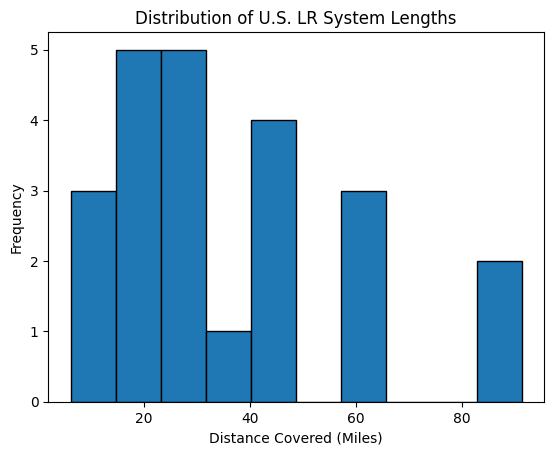

In [ ]:
plt.hist(df_drm_fares['length_of_system'],edgecolor='black')
plt.xlabel('Distance Covered (Miles)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Distribution of U.S. LR System Lengths')  # Plot title
plt.show()

In [ ]:
top_3_lengths = df_drm_fares.nlargest(3, 'length_of_system')
print(top_3_lengths)

   NTD ID                                        Agency Name Service    2022  \
13  60056                   Dallas Area Rapid Transit (DART)      DO  182.44   
21  90154  Los Angeles County Metropolitan Transportation...      DO  171.92   
20  90026        San Diego Metropolitan Transit System (MTS)      DO  130.30   

    ticket_cost  length_of_system  
13         2.50             91.22  
21         1.75             85.96  
20         2.50             65.15  


<Axes: title={'center': 'Mileage vs. Ticket Cost'}, xlabel='2022', ylabel='ticket_cost'>

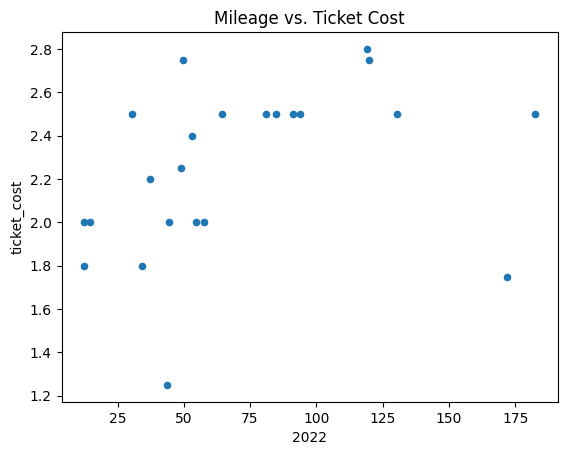

In [ ]:
df_drm_fares.plot(kind='scatter', x='2022', y='ticket_cost', title='Mileage vs. Ticket Cost')

In [ ]:
df_drm_fares['dollars_per_mile'] = df_drm_fares['ticket_cost'] / df_drm_fares['length_of_system']

In [ ]:
df_drm_fares = df_drm_fares.drop(columns='quartile_rank_drm')

In [ ]:
df_drm_fares = df_drm_fares.drop(columns='2022')

In [ ]:
df_drm_fares

,NTD ID,Agency Name,Service,ticket_cost,length_of_system,dollars_per_mile
0,00008,Tri-County Metropolitan Transportation Distric...,DO,2.80,59.5,0.05
1,00040,Central Puget Sound Regional Transit Authority...,DO,2.25,24.5,0.09
2,10003,Massachusetts Bay Transportation Authority (MBTA),DO,2.40,26.6,0.09
3,20004,Niagara Frontier Transportation Authority (NFT...,DO,2.00,6.2,0.32
4,20080,New Jersey Transit Corporation (NJ TRANSIT),DO,1.80,6.2,0.29
5,20080,New Jersey Transit Corporation (NJ TRANSIT),PT,1.80,17.0,0.11
6,30022,Port Authority of Allegheny County (Port Autho...,DO,2.75,24.8,0.11
7,30034,Maryland Transit Administration (MTA),DO,2.00,28.8,0.07
8,30083,Transportation District Commission of Hampton ...,DO,2.00,7.4,0.27
9,40008,City of Charlotte North Carolina (CATS),DO,2.20,18.6,0.12


In [ ]:
df_renamed = df_drm_fares.rename(columns={'ticket_cost': 'single_ticket_cost'})

In [ ]:
df_renamed_merge = pd.merge(df_renamed, df_bulk, left_on = 'NTD ID',right_on='ntd_id', how='outer')

In [ ]:
df_renamed_merge = df_renamed_merge.drop(columns=['ntd_id','agency','mode','ticket_type','year','quartile_rank_bulk'])

In [ ]:
df_renamed_merge = df_renamed_merge.drop(7)

In [ ]:
df_renamed_merge = df_renamed_merge.rename(columns={'ticket_cost': 'commuter_ticket_cost'})

In [ ]:
df_renamed_merge.to_csv('df_final_cost.csv', index=False)

In [ ]:
df_renamed_merge

,NTD ID,Agency Name,Service,single_ticket_cost,length_of_system,dollars_per_mile,commuter_ticket_cost,largest_tix_package_option
0,00008,Tri-County Metropolitan Transportation Distric...,DO,2.80,59.5,0.05,3.33,monthly
1,00040,Central Puget Sound Regional Transit Authority...,DO,2.25,24.5,0.09,5.00,daily
2,10003,Massachusetts Bay Transportation Authority (MBTA),DO,2.40,26.6,0.09,3.00,monthly
3,20004,Niagara Frontier Transportation Authority (NFT...,DO,2.00,6.2,0.32,2.50,monthly
5,20080,New Jersey Transit Corporation (NJ TRANSIT),DO,1.80,6.2,0.29,2.67,monthly
6,20080,New Jersey Transit Corporation (NJ TRANSIT),PT,1.80,17.0,0.11,2.23,monthly
8,30022,Port Authority of Allegheny County (Port Autho...,DO,2.75,24.8,0.11,2.94,annual
9,30034,Maryland Transit Administration (MTA),DO,2.00,28.8,0.07,2.48,monthly
10,30083,Transportation District Commission of Hampton ...,DO,2.00,7.4,0.27,2.33,monthly
11,40008,City of Charlotte North Carolina (CATS),DO,2.20,18.6,0.12,2.93,monthly


In [ ]:
df_drm_fares['dollars_per_mile'] = df_drm_fares['dollars_per_mile'].round(2)

In [ ]:
df_drm_fares['length_of_system'] = df_drm_fares['length_of_system'].round(1)

In [ ]:
df_drm_fares

,NTD ID,Agency Name,Service,2022,ticket_cost,length_of_system,dollars_per_mile,quartile_rank_drm
0,00008,Tri-County Metropolitan Transportation Distric...,DO,118.91,2.80,59.455,0.05,1
1,00040,Central Puget Sound Regional Transit Authority...,DO,48.98,2.25,24.490,0.09,3
2,10003,Massachusetts Bay Transportation Authority (MBTA),DO,53.25,2.40,26.625,0.09,3
3,20004,Niagara Frontier Transportation Authority (NFT...,DO,12.40,2.00,6.200,0.32,4
4,20080,New Jersey Transit Corporation (NJ TRANSIT),DO,12.42,1.80,6.210,0.29,4
5,20080,New Jersey Transit Corporation (NJ TRANSIT),PT,34.08,1.80,17.040,0.11,3
6,30022,Port Authority of Allegheny County (Port Autho...,DO,49.64,2.75,24.820,0.11,3
7,30034,Maryland Transit Administration (MTA),DO,57.60,2.00,28.800,0.07,2
8,30083,Transportation District Commission of Hampton ...,DO,14.80,2.00,7.400,0.27,4
9,40008,City of Charlotte North Carolina (CATS),DO,37.30,2.20,18.650,0.12,4


In [ ]:
df_drm_fares['dollars_per_mile'].describe()

count    23.000000
mean      0.101739
std       0.082498
min       0.020000
25%       0.050000
50%       0.070000
75%       0.110000
max       0.320000
Name: dollars_per_mile, dtype: float64

In [ ]:
# Create a function to apply to each row
def categorize(row):
    if row['dollars_per_mile'] <= 0.05:
        return 1
    elif row['dollars_per_mile'] > 0.05 and row['dollars_per_mile'] <= 0.07 :
        return 2
    elif row['dollars_per_mile'] > 0.07 and row['dollars_per_mile'] <= 0.11:
        return 3
    elif row['dollars_per_mile'] > 0.11:
        return 4

# Apply the function to create a new column 'Category'
df_drm_fares['quartile_rank_drm'] = df_drm_fares.apply(categorize, axis=1)

print(df_drm_fares)

   NTD ID                                        Agency Name Service    2022  \
0   00008  Tri-County Metropolitan Transportation Distric...      DO  118.91   
1   00040  Central Puget Sound Regional Transit Authority...      DO   48.98   
2   10003  Massachusetts Bay Transportation Authority (MBTA)      DO   53.25   
3   20004  Niagara Frontier Transportation Authority (NFT...      DO   12.40   
4   20080        New Jersey Transit Corporation (NJ TRANSIT)      DO   12.42   
5   20080        New Jersey Transit Corporation (NJ TRANSIT)      PT   34.08   
6   30022  Port Authority of Allegheny County (Port Autho...      DO   49.64   
7   30034              Maryland Transit Administration (MTA)      DO   57.60   
8   30083  Transportation District Commission of Hampton ...      DO   14.80   
9   40008            City of Charlotte North Carolina (CATS)      DO   37.30   
10  50015  The Greater Cleveland Regional Transit Authori...      DO   30.38   
11  50027                               

In [ ]:
top_3_x = df_drm_fares.nlargest(3, 'dollars_per_mile')
print(top_3_x)
bot_3_x = df_drm_fares.nsmallest(3, 'dollars_per_mile')
print(bot_3_x)

  NTD ID                                        Agency Name Service   2022  \
3  20004  Niagara Frontier Transportation Authority (NFT...      DO  12.40   
4  20080        New Jersey Transit Corporation (NJ TRANSIT)      DO  12.42   
8  30083  Transportation District Commission of Hampton ...      DO  14.80   

   ticket_cost  length_of_system  dollars_per_mile  quartile_rank_drm  
3          2.0              6.20              0.32                  4  
4          1.8              6.21              0.29                  4  
8          2.0              7.40              0.27                  4  
   NTD ID                                        Agency Name Service    2022  \
21  90154  Los Angeles County Metropolitan Transportation...      DO  171.92   
13  60056                   Dallas Area Rapid Transit (DART)      DO  182.44   
20  90026        San Diego Metropolitan Transit System (MTS)      DO  130.30   

    ticket_cost  length_of_system  dollars_per_mile  quartile_rank_drm  
21   

In [ ]:
bot_3_x = df_drm_fares.nsmallest(3, 'dollars_per_mile')
print(bot_3_x)

   NTD ID                                        Agency Name Service    2022  \
21  90154  Los Angeles County Metropolitan Transportation...      DO  171.92   
13  60056                   Dallas Area Rapid Transit (DART)      DO  182.44   
20  90026        San Diego Metropolitan Transit System (MTS)      DO  130.30   

    ticket_cost  length_of_system  dollars_per_mile  quartile_rank_drm  
21         1.75             85.96              0.02                  1  
13         2.50             91.22              0.03                  1  
20         2.50             65.15              0.04                  1  


In [ ]:
df_drm_fares
df_single_rides
df_single_day
df_bulk
filtered_sd

,year,ntd_id,agency,mode,ticket_cost,ticket_type,quartile_rank_sd,bulk_total_cost,min_days_for_bulk_savings,largest_tix_package_option,commuter_bonus
0,2024,00008,Tri-County Metropolitan Transportation Distric...,LR,5.6,single day,3,99.9,18.0,monthly,-1
2,2024,10003,Massachusetts Bay Transportation Authority,LR,11.0,single day,4,90.0,9.0,monthly,-1
3,2024,20004,Niagara Frontier Transportation Authority,LR,5.0,single day,2,75.0,15.0,monthly,-1
4,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.9,19.0,monthly,-1
5,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,66.9,19.0,monthly,-1
6,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.1,23.0,monthly,0
7,2024,20080,New Jersey Transit Corporation - Newark,LR,3.6,single day,1,80.1,23.0,monthly,0
9,2024,30034,Maryland Transit Administration,LR,4.6,single day,1,74.4,17.0,monthly,-1
10,2024,30083,Transportation District Commission of Hampton ...,LR,4.5,single day,1,69.9,16.0,monthly,-1
11,2024,40008,City of Charlotte North Carolina,LR,6.6,single day,4,87.9,14.0,monthly,-1


In [ ]:
# Merge df1 and df2 on 'ID', keeping only 'ID' and 'Value1' from df1 and 'Value2' from df2
merged_df = pd.merge(df_single_rides, df_single_day, on='ntd_id', how='outer')

# Merge the result with df3 on 'ID', keeping only 'ID', 'Value1', 'Value2', and 'Value3'
merged_df = pd.merge(merged_df, df_bulk, on='ntd_id', how='outer')

new_df = merged_df.loc[:, ['agency_x', 'ntd_id', 'quartile_rank_sr','quartile_rank_sd','quartile_rank_bulk']]

# Merge the result with df3 on 'ID', keeping only 'ID', 'Value1', 'Value2', and 'Value3'
merged_df = pd.merge(new_df, new_df_loc, left_on = 'ntd_id', right_on = 'NTD ID', how='outer')

#merged_df = pd.merge(merged_df, filtered_sd, on='ntd_id', how='outer')

new_df = merged_df.loc[:, ['agency_x', 'ntd_id', 'quartile_rank_sr','quartile_rank_sd','quartile_rank_bulk','quartile_rank_drm']]

In [ ]:
new_df = new_df.drop(6)

In [ ]:
new_df

,agency_x,ntd_id,quartile_rank_sr,quartile_rank_sd,quartile_rank_bulk,quartile_rank_drm
0,Tri-County Metropolitan Transportation Distric...,00008,4,3,4,1
1,Central Puget Sound Regional Transit Authority,00040,2,2,4,3
2,Massachusetts Bay Transportation Authority,10003,2,4,3,3
3,Niagara Frontier Transportation Authority,20004,1,2,1,4
4,New Jersey Transit Corporation - Newark,20080,1,1,1,4
8,Pittsburgh Regional Transit,30022,4,4,3,3
9,Maryland Transit Administration,30034,1,1,1,2
10,Transportation District Commission of Hampton ...,30083,1,1,1,4
11,City of Charlotte North Carolina,40008,2,4,3,4
12,The Greater Cleveland Regional Transit Authority,50015,3,2,4,4


In [ ]:
new_df.to_csv('df_final_cost_rankings.csv', index=False)

In [ ]:
new_df.sort_values(by='total_score')

,agency_x,ntd_id,quartile_rank_sr,quartile_rank_bulk,quartile_rank_drm,total_score
24,"Valley Metro Rail, Inc.",90209,1,1,2,4
9,Maryland Transit Administration,30034,1,1,2,4
23,Los Angeles County Metropolitan Transportation...,90154,1,2,1,4
22,San Diego Metropolitan Transit System,90026,3,1,1,5
3,Niagara Frontier Transportation Authority,20004,1,1,4,6
4,New Jersey Transit Corporation - Newark,20080,1,1,4,6
10,Transportation District Commission of Hampton ...,30083,1,1,4,6
17,Utah Transit Authority,80001,3,2,1,6
14,Metropolitan Transit Authority of Harris Count...,60008,1,3,2,6
16,Bi-State Development Agency of the Missouri-Il...,70006,3,2,1,6


In [ ]:
new_df = new_df.drop(columns='quartile_rank_sd')

In [ ]:
new_df['commuter_bonus'] = -1

# Update the new column based on conditionals
new_df.loc[new_df['ntd_id'] == '20080', 'commuter_bonus'] = 0

In [ ]:
new_df['total_score'] = new_df['quartile_rank_bulk'] + new_df['quartile_rank_drm'] + new_df['quartile_rank_sr']

In [ ]:
merged_df

In [ ]:
df_drm_fares

In [ ]:
new_df_loc = df_drm_fares.loc[:, ['NTD ID', 'quartile_rank_drm']]

In [ ]:
merged_df = pd.merge(df_single_rides, df_single_day, on='ntd_id', how='outer')

In [ ]:
merged_df

In [ ]:
df_single_rides.drop_duplicates()